## LOADING DATA

#Import libraries


In [1]:
import pandas as pd
import numpy as np

In [6]:
test=pd.read_csv("nisha_test data.csv")

In [8]:
train=pd.read_csv("nisha_train data.csv")

#List of column names

In [9]:
list(train)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [10]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#Types of data columns

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


DATA CLEANING AND PREPROCESSING

#Find missing values

In [13]:
train.isnull().sum()
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#Inpute missing values with mean (numerical variables)

In [14]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Test data

In [15]:
test.fillna(test.mean(),inplace=True) 
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

#Impute missing values with mode (categorical variables)

In [17]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True) 
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)  
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Treatment of outliers

In [19]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

# PREDICTIVE MODELLING

#Remove Loan_ID variable - Irrelevant

In [20]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


#Create target variable

In [21]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

#Build dummy variables for categorical variables

In [22]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#Split train data for cross validation

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

#(a)LOGISTIC REGRESSION ALGORITHM
#Fit model

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
pred_cv=model.predict(x_cv)

#Evaluate accuracy of model

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_cv,pred_cv) #78.86%
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)


[[14 22]
 [ 5 82]]


#(b)DECISION TREE ALGORITHM

In [28]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Predict values for cv data

In [29]:
pred_cv1=dt.predict(x_cv)

#Evaluate accuracy of model

In [30]:
accuracy_score(y_cv,pred_cv1) #71.54%
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

[[17 19]
 [12 75]]


#(c)RANDOM FOREST ALGORITHM

#Fit model

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Predict values for cv data

In [32]:
pred_cv2=rf.predict(x_cv)

# Evaluate accuracy of model

In [33]:
accuracy_score(y_cv,pred_cv2) #77.23%
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

[[16 20]
 [13 74]]


# (d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

In [34]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
pred_cv3=svm_model.predict(x_cv)


In [36]:
accuracy_score(y_cv,pred_cv3) #64.23%
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

[[ 0 36]
 [ 0 87]]


# (e)NAIVE BAYES ALGORITHM

In [37]:
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
pred_cv4=nb.predict(x_cv)

In [39]:
accuracy_score(y_cv,pred_cv4) #80.49%
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

[[15 21]
 [ 7 80]]


#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
pred_cv5=kNN.predict(x_cv)

In [42]:
accuracy_score(y_cv,pred_cv5) #64.23%
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

[[ 5 31]
 [15 72]]


#(g) GRADIENT BOOSTING MACHINE ALGORITHM

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [44]:
pred_cv6=gbm.predict(x_cv)

#Evaluate accuracy of model

In [45]:
accuracy_score(y_cv,pred_cv6) #78.86%
matrix6=confusion_matrix(y_cv,pred_cv6)
print(matrix6)

[[15 21]
 [ 7 80]]


#Predict values using test data (Naive Bayes)

In [46]:
pred_test=nb.predict(test)

# Write test results in csv file

In [47]:
predictions=pd.DataFrame(pred_test, columns=['predictions']).to_csv('Credit_Predictions.csv')

In [61]:
accuracy_score(y_cv,pred_cv6) #78.86%
matrix6=confusion_matrix(y_cv,pred_cv6)
print(matrix6)

[[15 21]
 [ 7 80]]


In [62]:
pred_cv6=gbm.predict(x_cv)

In [64]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


# Select best model in order of accuracy
#Naive Bayes - 80.49%
#Logistic Regression - 78.86%
#Gradient Boosting Machine -78.86%
#Random Forest - 77.23%
#Decision Tree - 71.54%
#Support Vector Machine - 64.23%
#k-Nearest Neighbors(kNN) - 64.23%

#  VISUALIZATION 

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
df=pd.read_csv("nisha_test data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


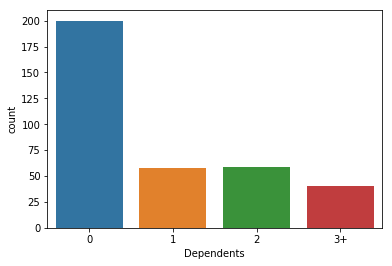

In [66]:
sns.countplot(x="Dependents",data=df)

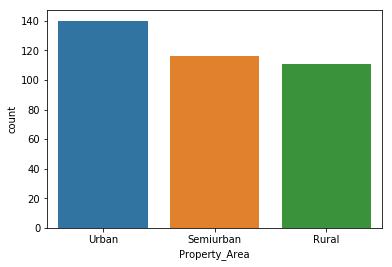

In [67]:
sns.countplot(x="Property_Area",data=df)

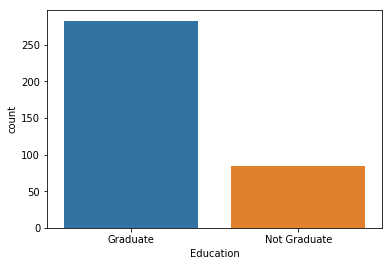

In [70]:
sns.countplot(x="Education",data=df)

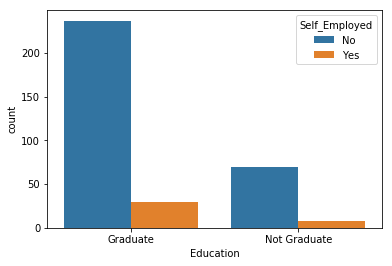

In [71]:
sns.countplot(x="Education",hue="Self_Employed",data=df)

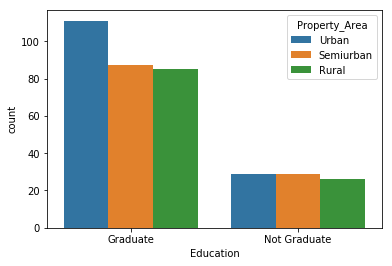

In [73]:
sns.countplot(x="Education",hue="Property_Area",data=df)

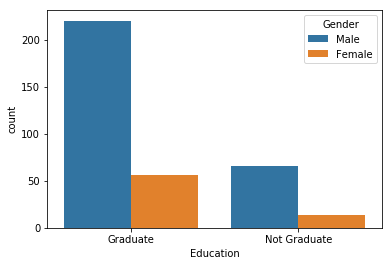

In [74]:
sns.countplot(x="Education",hue="Gender",data=df)

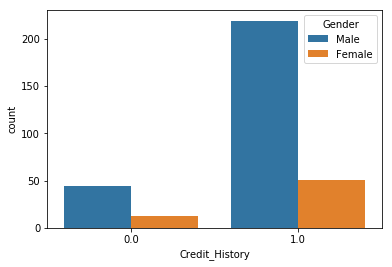

In [75]:
sns.countplot(x="Credit_History",hue="Gender",data=df)

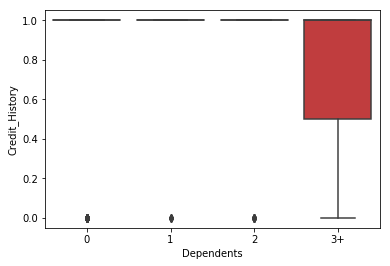

In [78]:
sns.boxplot(x="Dependents",y="Credit_History",data=df)

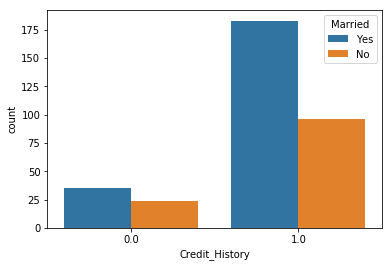

In [79]:
sns.countplot(x="Credit_History",hue="Married",data=df)